In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
from time import time

In [2]:
def create_instance(d, n, sigma):
    """return dataset and fresh sample"""
    X = np.random.choice((-1,1), size=(n,d))
    Y = np.random.choice((-1,1), size=(n,d))
    return X, Y

def gaussian_mechanism(X, sigma):
    """report column averages with Gaussian noise"""
    Z = np.random.normal(0, sigma, size=X.shape[1])
    X_bar = (1/X.shape[0]) * np.sum(X, axis=0)
    return X_bar + Z

def round_mechanism(X, sigma):
    """report column averages rounded up to multiples of sigma"""
    X_bar = (1/X.shape[0]) * np.sum(X, axis=0)
    X_bar = X_bar / sigma
    return sigma * np.ceil(X_bar)

def scores(X, Y, a):
    """calculate in/out scores"""
    outs = np.zeros(n)
    ins = np.zeros(n)
    for i in range(n):
        outs[i] = a@Y[i,:]
        ins[i] = a@X[i,:]
    return ins, outs

def TPR(X, Y, a):
    """calculate true positive rate for data in and out"""
    ins, outs = scores(X,Y,a)
    q = np.quantile(outs, 0.95)
    frac = np.sum(ins >= q) / n
    return frac

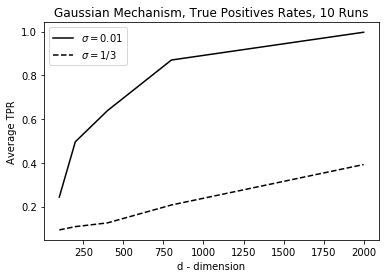

In [6]:
# plots for the Gaussian mechanism
np.random.seed(591)
n = 100
runs = 10
ds = np.array([100, 200, 400, 800, 2000])

sigma = 0.01
tprs = np.zeros(ds.shape[0], dtype='float')
for run in range(runs):
    for i, d in enumerate(ds):
        X, Y = create_instance(d, n, sigma)
        a = gaussian_mechanism(X, sigma)
        tprs[i] += TPR(X,Y,a)

tprs = tprs / runs
plt.plot(ds,tprs, 'k-', label='$\sigma=0.01$')

sigma = 1/3
tprs = np.zeros(ds.shape[0], dtype='float')
for run in range(runs):
    for i, d in enumerate(ds):
        X, Y = create_instance(d, n, sigma)
        a = gaussian_mechanism(X, sigma)
        tprs[i] += TPR(X,Y,a)

tprs = tprs / runs
plt.plot(ds,tprs, 'k--', label='$\sigma=1/3$')
plt.xlabel('d - dimension')
plt.ylabel('Average TPR')
plt.title('Gaussian Mechanism, True Positives Rates, 10 Runs')
plt.legend()
plt.show()

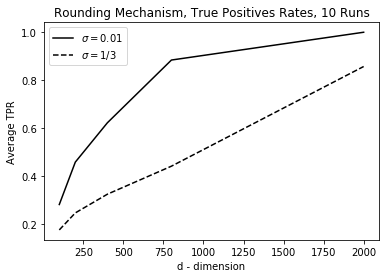

In [7]:
# plot for the rounding mechanism
np.random.seed(591)
n = 100
runs = 10
ds = np.array([100, 200, 400, 800, 2000])

sigma = 0.01
tprs = np.zeros(ds.shape[0], dtype='float')
for run in range(runs):
    for i, d in enumerate(ds):
        X, Y = create_instance(d, n, sigma)
        a = round_mechanism(X, sigma)
        tprs[i] += TPR(X,Y,a)

tprs = tprs / runs
plt.plot(ds,tprs, 'k-', label='$\sigma=0.01$')

sigma = 1/3
tprs = np.zeros(ds.shape[0], dtype='float')
for run in range(runs):
    for i, d in enumerate(ds):
        X, Y = create_instance(d, n, sigma)
        a = round_mechanism(X, sigma)
        tprs[i] += TPR(X,Y,a)

tprs = tprs / runs
plt.plot(ds,tprs, 'k--', label='$\sigma=1/3$')
plt.xlabel('d - dimension')
plt.ylabel('Average TPR')
plt.title('Rounding Mechanism, True Positives Rates, 10 Runs')
plt.legend()
plt.show()